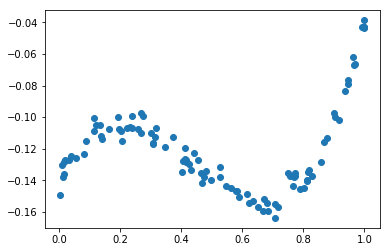

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

SAMPLES = 100 # sample_num
WEIGHTS = np.array([-.14, .4, -1.3, 1.0]) #f()

x = np.random.random_sample(SAMPLES)
y = .005 * np.random.randn(SAMPLES)
for i in range(len(WEIGHTS)):
    y += WEIGHTS[i] * (x ** i)

plt.plot(x, y, 'o')

In [2]:
ITER = 1000000
LEARNING_RATE = 1

def LinearRegressionGrad(X_train, y_train):
    target_nums = X_train.shape[0]
    feature_nums = X_train.shape[1]
    
    weights = np.random.rand(feature_nums) # model
    lr_weights = np.zeros_like(weights) # learning_rate of model

    for i in range(ITER):
        sigma_sum = 0
        weights_grad = np.zeros_like(weights) # gradient of weights
        for j in range(target_nums):
            sigma = y_train[j] - (weights * X_train[j]).sum(); # temp
            sigma_sum += sigma * sigma
            for k in range(feature_nums):
                weights_grad[k] -= 2.0 * sigma * X_train[j][k] # gradient
                lr_weights[k] += weights_grad[k] ** 2 # fix learning_rate (AdaGrad)
                
        for j in range(feature_nums):
            weights[j] -= LEARNING_RATE / np.sqrt(lr_weights[j]) * weights_grad[j] # fix weights
        
        if sigma_sum < 0.005:
            print("Early stoping!!!")
            return weights
        
        if i % 1000 == 0:
            print(f'Iter: {i}')
            print(f'Loss: {sigma_sum}')
            
            
    return weights

Iter: 0
Loss: 199.78621473052266
Iter: 1000
Loss: 0.02785101775489395
Iter: 2000
Loss: 0.02301709530532139
Iter: 3000
Loss: 0.021787931703375327
Iter: 4000
Loss: 0.020900291505369276
Iter: 5000
Loss: 0.0200768390638292
Iter: 6000
Loss: 0.01929253660791034
Iter: 7000
Loss: 0.018543737949868567
Iter: 8000
Loss: 0.01782867542718652
Iter: 9000
Loss: 0.017145807189594554
Iter: 10000
Loss: 0.01649367428446854
Iter: 11000
Loss: 0.015870885577459744
Iter: 12000
Loss: 0.015276113636312816
Iter: 13000
Loss: 0.014708091680894072
Iter: 14000
Loss: 0.01416561075404554
Iter: 15000
Loss: 0.01364751703483291
Iter: 16000
Loss: 0.013152709281202112
Iter: 17000
Loss: 0.012680136394989076
Iter: 18000
Loss: 0.012228795103067307
Iter: 19000
Loss: 0.011797727748799804
Iter: 20000
Loss: 0.011386020188282414
Iter: 21000
Loss: 0.01099279978616525
Iter: 22000
Loss: 0.01061723350611867
Iter: 23000
Loss: 0.010258526091272872
Iter: 24000
Loss: 0.009915918330209198
Iter: 25000
Loss: 0.00958868540431268
Iter: 26000
L

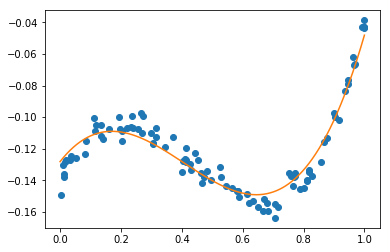

In [3]:
X = np.array([x ** i for i in range(4)]).T
model = LinearRegressionGrad(X, y)

print(model)
plt.plot(x, y, 'o')

x_test = np.linspace(0, 1, 1000)
y_test = np.zeros_like(x_test)
for i in range(len(model)):
    y_test += model[i] * (x_test ** i)
    
plt.plot(x_test, y_test)